In [1]:

import pandas as pd
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# My Func

def make_classification_report(model, y_true, x_test, title=''):

    # Generate predictions
    y_preds = model.predict(x_test)
    print('__________________________________________________________________')
    print(f'CLASSIFICATION REPORT FOR: \n\t{title}')
    print('__________________________________________________________________')
    print('\n')
    
    # Generate report
    report = metrics.classification_report(y_true, y_preds, 
                                target_names=['not depressed', 'depressed'])
    report_dict = metrics.classification_report(y_true, y_preds, 
                                                output_dict=True,
                             target_names=['not depressed', 'depressed'])
    
    # Add the title to the report dictionary
    report_dict['title'] = title
    print(report)
    print('__________________________________________________________________')
    
    return report_dict

def plot_confusion_matrix(model, X, y, title=''): 
    # Make predictions on the test set
    y_pred = model.predict(X)
    
    # Plot the matrix with labels    
    fig, ax = plt.subplots(figsize=(8, 6))
    cm = metrics.confusion_matrix(y, y_pred, normalize='true')
    sns.heatmap(cm, annot=True, cmap='Blues', annot_kws={"size": 16}, cbar=True,
                xticklabels=['not depressed', 'depressed'],
                yticklabels=['not depressed', 'depressed'],
                ax=ax)
    
    # Remove grid lines
    ax.grid(False)
    
    # Set title
    ax.set_title(f'Confusion Matrix For {title}', fontdict={'fontsize':17})
    
    # Set label
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

    plt.show()
    print('__________________________________________________________________')
    return fig

def evaluate_model(model, xtest, ytest, title=''):
    make_classification_report(model, ytest, xtest, title=title)
    plot_confusion_matrix(model, xtest, ytest, title=title)


In [3]:
x_train = pd.read_csv("./CSVFiles/X_train.csv", index_col='SEQN')
y_train = pd.read_csv("./CSVFiles/Y_train.csv", index_col='SEQN')
x_test = pd.read_csv("./CSVFiles/X_test.csv", index_col='SEQN')
y_test = pd.read_csv("./CSVFiles/Y_test.csv", index_col='SEQN')

# KNN Model

C:\Users\jirap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\jirap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\jirap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

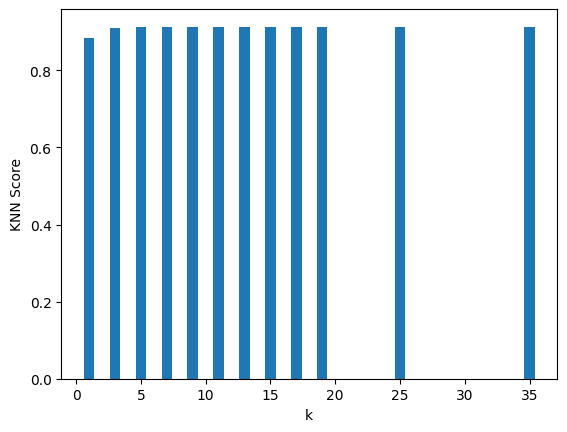

Best n_neighbors: 9


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# values for 'n_neighbors'
n_neighbors_values = [1,3,5,7,9,11,13,15,17,19,25,35]

accuracy_scores = {}

# Train KNN models using each 'n_neighbors' values
for n_neighbors in n_neighbors_values:
    # Create KNN model
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # fit model
    knn_model.fit(x_train, y_train)
    
    # pred
    y_pred = knn_model.predict(x_test)
    
    # Cal accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[n_neighbors] = accuracy

# Plot a bar graph to display the accuracy score for each 'n_neighbors' value
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.xlabel('k')
plt.ylabel('KNN Score')
plt.show()

# best n_neighbors
best_n_neighbors = max(accuracy_scores, key=accuracy_scores.get)
print(f"Best n_neighbors: {best_n_neighbors}")


C:\Users\jirap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


__________________________________________________________________
CLASSIFICATION REPORT FOR: 
	KNN Model
__________________________________________________________________


               precision    recall  f1-score   support

not depressed       0.91      1.00      0.95      6618
    depressed       0.80      0.01      0.02       634

     accuracy                           0.91      7252
    macro avg       0.86      0.51      0.49      7252
 weighted avg       0.90      0.91      0.87      7252

__________________________________________________________________


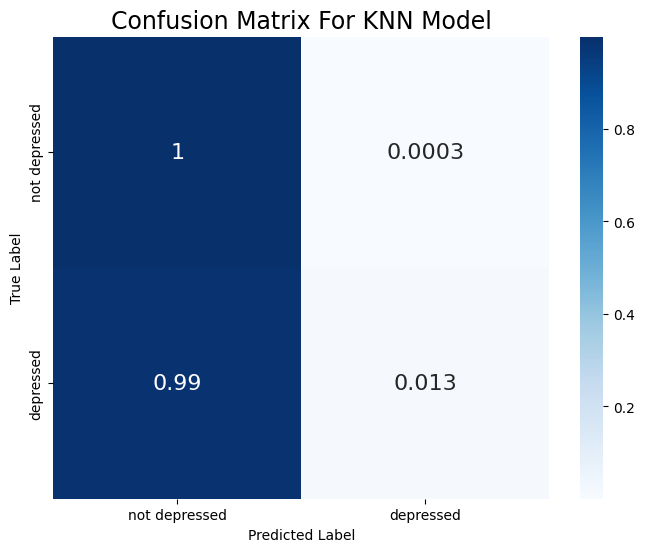

__________________________________________________________________


In [5]:
best_knn_model = KNeighborsClassifier(n_neighbors=best_n_neighbors)
best_knn_model.fit(x_train, y_train)

# Evaluate the model
evaluate_model(best_knn_model, x_test, y_test, title='KNN Model')

# Stochastic Gradient Descent Linear Classifier

In [6]:
from sklearn.linear_model import SGDClassifier

In [7]:
# Creating the classifier
sgd_clf = SGDClassifier(random_state=123, n_jobs=-1, class_weight='balanced')

# Fitting to the training data
sgd_base = sgd_clf.fit(x_train, y_train)

C:\Users\jirap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


__________________________________________________________________
CLASSIFICATION REPORT FOR: 
	Stochastic Gradient Descent Base Model
__________________________________________________________________


               precision    recall  f1-score   support

not depressed       0.96      0.68      0.79      6618
    depressed       0.17      0.68      0.27       634

     accuracy                           0.68      7252
    macro avg       0.56      0.68      0.53      7252
 weighted avg       0.89      0.68      0.75      7252

__________________________________________________________________


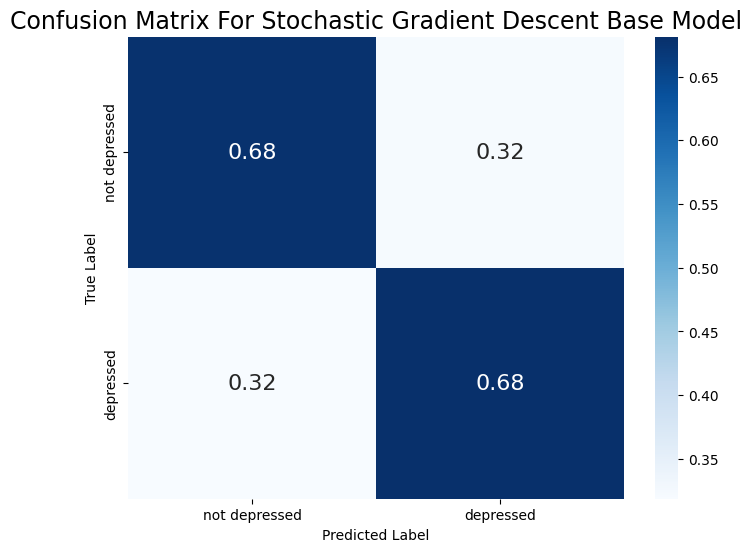

__________________________________________________________________


In [8]:
evaluate_model(sgd_base, x_test, y_test, title='Stochastic Gradient Descent Base Model')

In [9]:
import joblib

# Save sgd model
joblib.dump(sgd_clf, 'FinalModel.joblib')

['FinalModel.joblib']